In [324]:
import pandas as pd
import sys
import importlib
sys.path.append("../scripts/")
import regex_gradle
import regex_maven
import rq_aux
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import numpy as np

importlib.reload(regex_gradle)
importlib.reload(regex_maven)
importlib.reload(rq_aux)
sns.set(color_codes=True)
sns.set_style("whitegrid")

In [325]:
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [326]:
rq_aux.check_categories(regex_maven)

rq_aux.check_categories(regex_gradle)

In [327]:
noerror = True
output_path = "../data/output_data/"
#overview_dataset = "overview-subtask-noerror-True.csv"
#overview_dataset = f"{output_path}overview_daylight_noerror.csv"
#alltasks_dataset = f"{output_path}all_tasks_noerror.csv"

overview_dataset = f"{output_path}overview_cloc2_noerror.csv"
alltasks_dataset = f"{output_path}all_tasks_cloc2_noerror.csv"

In [328]:
# Read Data Frame: Workflow has Only Subtasks that Succeeded
df = pd.read_csv(overview_dataset)

In [329]:
df_maven = df[df["is_maven"]]
df_gradle = df[df["is_gradle"]]
df_both = df[df["is_maven"] & df["is_gradle"]]
df_none = df[(df["is_maven"] == False) & (df["is_gradle"] == False)]

In [330]:
df_both

,name,tasks,slope,pearson,spearman,seconds,energy,null_energy,null_time,is_maven,...,gradle_test_energy,gradle_test_seconds,gradle_test_n,gradle_war_energy,gradle_war_seconds,gradle_war_n,gradle_other_energy,gradle_other_seconds,gradle_other_n,size
85,CorfuDB_CorfuDB___compatibility-test.yml.csv_s...,72,0.000014,0.904725,0.851532,568477647,8101.448122,0,0,True,...,0.000000,0,0,0.0,0,0,0.000000,0,0,large
86,CorfuDB_CorfuDB___injection-framework-test.yml...,78,0.000016,0.928479,0.875313,608406211,9991.554776,0,0,True,...,0.000000,0,0,0.0,0,0,0.000000,0,0,large
619,amazon-ion_ion-java___ion-java-performance-reg...,98,0.000028,0.999644,0.925803,14410438179,398661.858158,0,0,True,...,0.000000,0,0,0.0,0,0,4294.421451,117905946,127,medium
851,asciidoctor_asciidoctorj___continuous-integrat...,86,0.000027,0.999331,0.875251,14012644189,377587.309019,0,0,True,...,0.000000,0,0,0.0,0,0,0.000000,0,0,medium
1787,mapstruct_mapstruct-examples___main.yml.csv_si...,71,0.000018,0.979140,0.834201,3233414128,56754.168548,0,0,True,...,0.000000,0,0,0.0,0,0,0.000000,0,0,small
2520,thombergs_code-examples___ci.yml.csv_simple,64,0.000017,0.998883,0.924390,6989184591,119646.266806,0,0,True,...,1649.149114,130551752,3,0.0,0,0,0.000000,0,0,medium


In [331]:
df_both = rq_aux.remove_workflows_no_subtask(df_both, 'maven_', regex_maven.plugins)

Workflows No Subtask: Removed 1 workflows: 6 -> 5


In [332]:
df_both = rq_aux.remove_workflows_no_subtask(df_both, 'gradle_', regex_gradle.plugins)

Workflows No Subtask: Removed 4 workflows: 5 -> 1


In [333]:
df_both

,name,tasks,slope,pearson,spearman,seconds,energy,null_energy,null_time,is_maven,...,gradle_test_energy,gradle_test_seconds,gradle_test_n,gradle_war_energy,gradle_war_seconds,gradle_war_n,gradle_other_energy,gradle_other_seconds,gradle_other_n,size
2520,thombergs_code-examples___ci.yml.csv_simple,64,0.000017,0.998883,0.92439,6989184591,119646.266806,0,0,True,...,1649.149114,130551752,3,0.0,0,0,0.0,0,0,medium


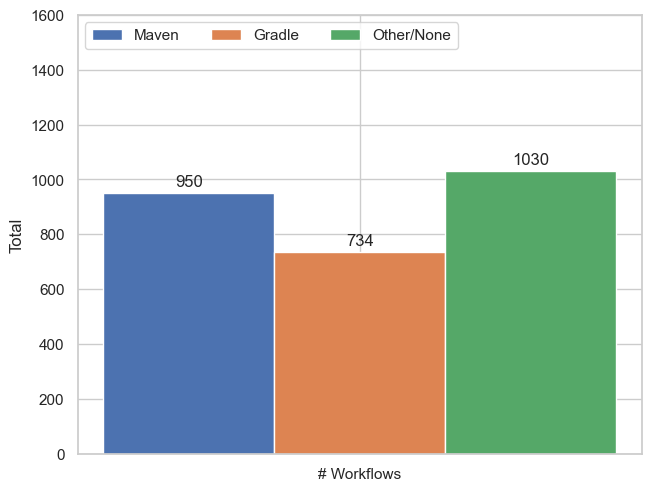

In [334]:
properties = ["# Workflows"]

bars = {
    'Maven':  len(df_maven),
    'Gradle': len(df_gradle),
    #'Other/None':  len(df) - len(df_maven) - len(df_gradle) + len(df_both),
    'Other/None' : len(df_none),
}

title = 'Number of Workflows by Build Automation Tool'
title = ''

rq_aux.plot_bars(properties, bars, title, lim=1600, ylabel = "Total")

In [335]:
# Remove Maven Workflows Without Maven Subtasks
df_maven = rq_aux.remove_workflows_no_subtask(df_maven, 'maven_', regex_maven.plugins)

Workflows No Subtask: Removed 210 workflows: 950 -> 740


In [336]:
# Remove Gradle Workflows Without Gradle Subtasks
df_gradle = rq_aux.remove_workflows_no_subtask(df_gradle, 'gradle_', regex_gradle.plugins)

Workflows No Subtask: Removed 306 workflows: 734 -> 428


In [337]:
df_maven_size = rq_aux.create_dfs_size(df_maven, 'is_maven')

sum_maven = {}
for x in sizes2:
  sum_maven[x] = rq_aux.make_dict_subtask(df_maven_size[x], "maven_", regex_maven.plugins)

for key, value in sum_maven.items():
    rq_aux.print_ratios_summary(key.title(), value, sum_maven['all'])

*** All ***
N_Work:  740 (100.0%);  N:  137333 (100.0%);  Energy:  20307583 (100.0%);  Seconds:  1098762177084 (100.0%);  
*** Small ***
N_Work:  88 (11.9%);  N:  7734 (5.6%);  Energy:  618145 (3.0%);  Seconds:  35638455380 (3.2%);  
*** Medium ***
N_Work:  376 (50.8%);  N:  49963 (36.4%);  Energy:  9795753 (48.2%);  Seconds:  460619837830 (41.9%);  
*** Large ***
N_Work:  276 (37.3%);  N:  79636 (58.0%);  Energy:  9893685 (48.7%);  Seconds:  602503883874 (54.8%);  


In [338]:
df_gradle_size = rq_aux.create_dfs_size(df_gradle, 'is_gradle')

sum_gradle = {}
for x in sizes2:
  sum_gradle[x] = rq_aux.make_dict_subtask(df_gradle_size[x], "gradle_", regex_gradle.plugins)

for key, value in sum_gradle.items():
    rq_aux.print_ratios_summary(key.title(), value, sum_gradle['all'])

*** All ***
N_Work:  428 (100.0%);  N:  46022 (100.0%);  Energy:  6388768 (100.0%);  Seconds:  295917770296 (100.0%);  
*** Small ***
N_Work:  41 (9.6%);  N:  1209 (2.6%);  Energy:  162478 (2.5%);  Seconds:  7912732769 (2.7%);  
*** Medium ***
N_Work:  240 (56.1%);  N:  16952 (36.8%);  Energy:  2098761 (32.9%);  Seconds:  95167688276 (32.2%);  
*** Large ***
N_Work:  147 (34.3%);  N:  27861 (60.5%);  Energy:  4127529 (64.6%);  Seconds:  192837349251 (65.2%);  


*** Maven ***
All:  26851938 (25.4%);  Small:  639852 (31.0%);  Medium:  12202194 (38.3%);  Large:  14009892 (19.5%);  
*** Maven Plugins ***
All:  20307583 (19.2%);  Small:  618145 (29.9%);  Medium:  9795753 (30.8%);  Large:  9893685 (13.8%);  
*** Gradle ***
All:  6265421 (5.9%);  Small:  154254 (7.5%);  Medium:  2299293 (7.2%);  Large:  3811874 (5.3%);  
*** Gradle Tasks ***
All:  6388768 (6.0%);  Small:  162478 (7.9%);  Medium:  2098761 (6.6%);  Large:  4127529 (5.7%);  


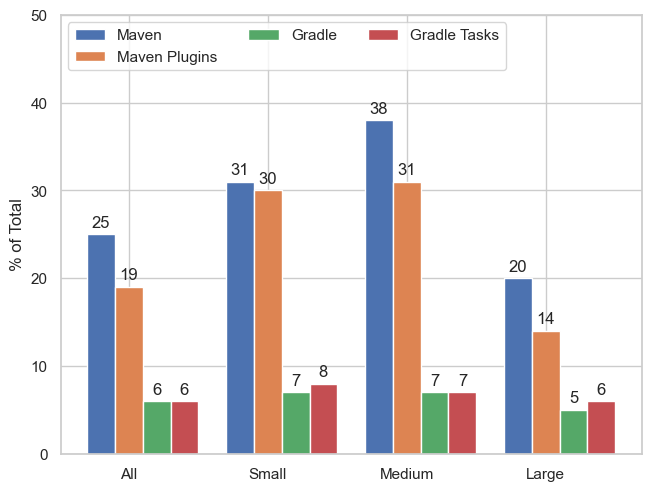

In [339]:
bar_energy = {
    "maven" :  {},
    "mav_tasks": {},
    "gradle" : {},
    "grad_tasks" : {},
    "total"  : {}
}

for x in sizes2:
    bar_energy["maven"][x]   = df_maven_size[x]["maven_energy"].sum()
    bar_energy["mav_tasks"][x]   = sum_maven[x]["energy"]
    bar_energy["gradle"][x]  = df_gradle_size[x]["gradle_energy"].sum()
    bar_energy["grad_tasks"][x]  = sum_gradle[x]["energy"].sum()
    bar_energy["total"][x]   = df_maven_size[x]["energy"].sum() + df_gradle_size[x]["energy"].sum()
    
rq_aux.print_ratios_summary("Maven",          bar_energy["maven"],  bar_energy["total"])
rq_aux.print_ratios_summary("Maven Plugins",  bar_energy["mav_tasks"],  bar_energy["total"])
rq_aux.print_ratios_summary("Gradle",         bar_energy["gradle"], bar_energy["total"])
rq_aux.print_ratios_summary("Gradle Tasks",   bar_energy["grad_tasks"], bar_energy["total"])

properties = []
for x in sizes2:
  properties.append(x.title())

bars = {
    'Maven':  rq_aux.get_ratios(bar_energy["maven"],  bar_energy["total"], 0),
    'Maven Plugins':  rq_aux.get_ratios(bar_energy["mav_tasks"],  bar_energy["total"], 0),
    'Gradle': rq_aux.get_ratios(bar_energy["gradle"], bar_energy["total"], 0),
    'Gradle Tasks': rq_aux.get_ratios(bar_energy["grad_tasks"], bar_energy["total"], 0),
}

title = '% of Energy Related to Maven/Gradle Tasks by Size of Project'


rq_aux.plot_bars(properties, bars, title = '',lim=50, width=0.2)

*** Maven Plugins ***
All:  20307583 (24.4%);  Small:  618145 (37.3%);  Medium:  9795753 (37.6%);  Large:  9893685 (17.8%);  
*** Gradle Tasks ***
All:  6388768 (28.5%);  Small:  162478 (39.7%);  Medium:  2098761 (36.2%);  Large:  4127529 (25.4%);  


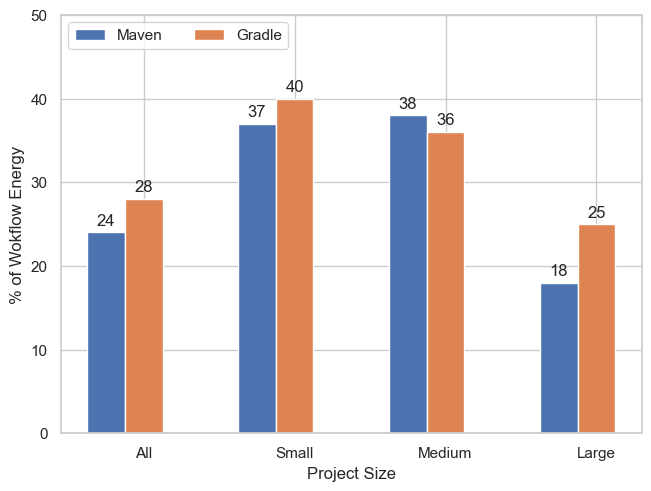

In [340]:
bar_energy = {
   # "maven" :  {},
    "mav_tasks": {},
   # "gradle" : {},
    "grad_tasks" : {},
    "total_maven"  : {},
    "total_gradle" : {}
}

for x in sizes2:
    #bar_energy["maven"][x]   = df_maven_size[x]["maven_energy"].sum()
    bar_energy["mav_tasks"][x]   = sum_maven[x]["energy"]
    #bar_energy["gradle"][x]  = df_gradle_size[x]["gradle_energy"].sum()
    bar_energy["grad_tasks"][x]  = sum_gradle[x]["energy"].sum()
    bar_energy["total_maven"][x]   = df_maven_size[x]["energy"].sum()
    bar_energy["total_gradle"][x]   = df_gradle_size[x]["energy"].sum()

#rq_aux.print_ratios_summary("Maven",          bar_energy["maven"],  bar_energy["total"])
rq_aux.print_ratios_summary("Maven Plugins",  bar_energy["mav_tasks"],  bar_energy["total_maven"])
#rq_aux.print_ratios_summary("Gradle",         bar_energy["gradle"], bar_energy["total"])
rq_aux.print_ratios_summary("Gradle Tasks",   bar_energy["grad_tasks"], bar_energy["total_gradle"])

properties = []
for x in sizes2:
  properties.append(x.title())

bars = {
    #'Maven':  rq_aux.get_ratios(bar_energy["maven"],  bar_energy["total"], 0),
    'Maven':  rq_aux.get_ratios(bar_energy["mav_tasks"],  bar_energy["total_maven"], 0),
    #'Gradle': rq_aux.get_ratios(bar_energy["gradle"], bar_energy["total"], 0),
    'Gradle': rq_aux.get_ratios(bar_energy["grad_tasks"], bar_energy["total_gradle"], 0),
}

title = '% of Energy Related to Maven/Gradle Tasks by Size of Project'


rq_aux.plot_bars(properties, bars, title = '',lim=50, ylabel='% of Wokflow Energy', xlabel='Project Size')

In [341]:
df_all_maven = rq_aux.read_all_tasks(alltasks_dataset, "maven", noerror)

all_maven_energy = rq_aux.get_energy_all_tasks(df_all_maven)

Tasks With Error: Removed 0 workflows: 183355 -> 183355
Build tool maven = 137333
len small = 7734
Group len small = 88
len medium = 49963
Group len medium = 376
len large = 79636
Group len large = 276


In [342]:
for key, value in all_maven_energy.items():
    total_energy = sum_maven[key]['energy']
    assert abs(sum(value) - total_energy) < 0.000001, f"Different sum: {sum(value) - total_energy}"
    print(f"{key.title()}: Workflows: {len(value)}", end="")
    rq_aux.print_ratio(sum(value), sum(all_maven_energy['all']), '')

Small: Workflows: 88:  618145 (3.0%)
Medium: Workflows: 376:  9795753 (48.2%)
Large: Workflows: 276:  9893685 (48.7%)
All: Workflows: 740:  20307583 (100.0%)


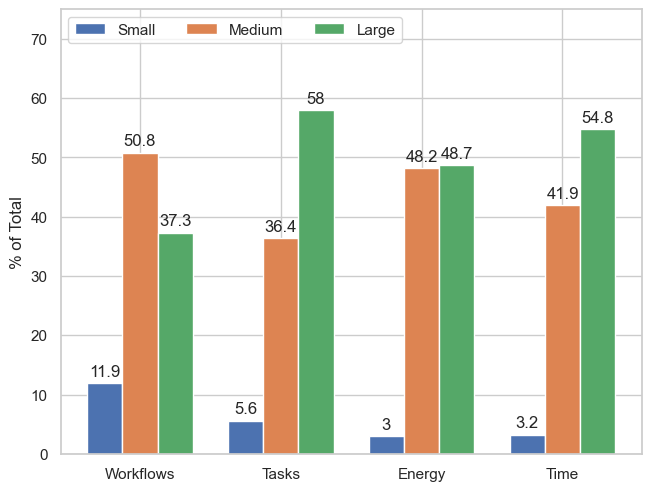

In [343]:
properties  = ("Workflows", "Tasks", "Energy", "Time")

bars = {}
for x in sizes1:
    bars[x.title()] = rq_aux.get_ratios(sum_maven[x], sum_maven['all'])

title = 'Number of Maven Projects, Energy Consumption and Execution Time by Size of Project'

rq_aux.plot_bars(properties, bars, '',lim=75)

In [344]:
df_all_gradle = rq_aux.read_all_tasks(alltasks_dataset, "gradle")

all_gradle_energy = rq_aux.get_energy_all_tasks(df_all_gradle)

Tasks With Error: Removed 0 workflows: 183355 -> 183355
Build tool gradle = 46022
len small = 1209
Group len small = 41
len medium = 16952
Group len medium = 240
len large = 27861
Group len large = 147


In [345]:
for key, value in all_gradle_energy.items():
    total_energy = sum_gradle[key]['energy']
    assert abs(sum(value) - total_energy) < 0.000001, f"Different sum: {sum(value) - total_energy}"
    print(f"{key.title()}: Workflows: {len(value)}", end="")
    rq_aux.print_ratio(sum(value), sum(all_gradle_energy['all']), '')

Small: Workflows: 41:  162478 (2.5%)
Medium: Workflows: 240:  2098761 (32.9%)
Large: Workflows: 147:  4127529 (64.6%)
All: Workflows: 428:  6388768 (100.0%)


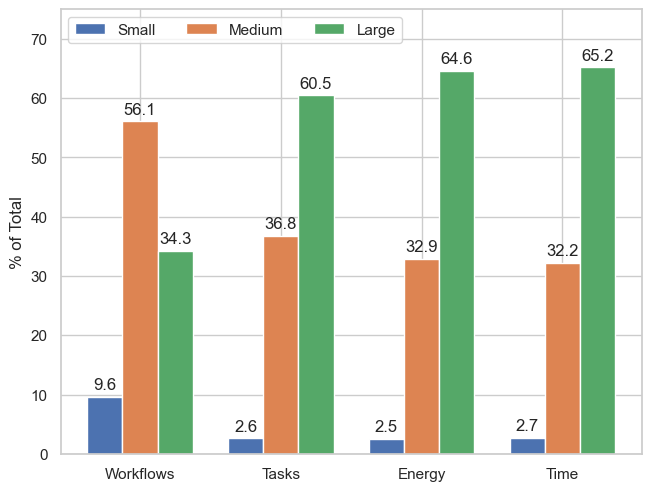

In [346]:
bars = {}
for x in sizes1:
    bars[x.title()] = rq_aux.get_ratios(sum_gradle[x], sum_gradle['all'])

title = 'Number of Gradle Workflows, Energy Consumption and Execution Time by Size of Project'

rq_aux.plot_bars(properties, bars, title='',lim=75)

Text(0, 0.5, '# Workflows')

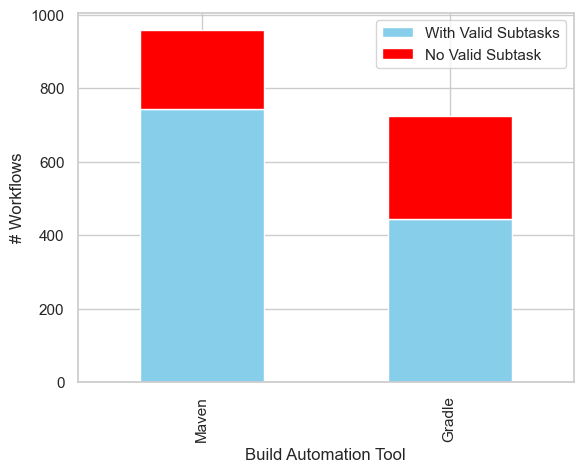

In [347]:
df = pd.DataFrame({'With Valid Subtasks' : [745, 444],
                   'No Valid Subtask'    : [213, 281],
                  },
                  index=['Maven', 'Gradle'])


df.plot(kind='bar', stacked=True, color=['skyblue', 'red'])

plt.xlabel('Build Automation Tool')
plt.ylabel('# Workflows')

#plt.title('Workflows with Valid Subtasks')

In [348]:
maven_energy = rq_aux.get_energy_all_tasks(df_all_maven, group=False, all=False)

len small = 7734
len medium = 49963
len large = 79636


In [349]:
gradle_energy = rq_aux.get_energy_all_tasks(df_all_gradle, group=False, all=False)

len small = 1209
len medium = 16952
len large = 27861


In [350]:
# Normality of the Energy Consumption of Maven tasks
for key, value in maven_energy.items():
  rq_aux.test_normality(value)

# Normality of the Energy Consumption of Gradle tasks
for key, value in gradle_energy.items():
  rq_aux.test_normality(value)

stat=18030.228, p=0.000
probably non gaussian
stat=204711.065, p=0.000
probably non gaussian
stat=256859.568, p=0.000
probably non gaussian
stat=2465.616, p=0.000
probably non gaussian
stat=52529.443, p=0.000
probably non gaussian
stat=89554.888, p=0.000
probably non gaussian


In [351]:
#perform the Mann-Whitney U test
print(stats.kruskal(*maven_energy.values()))

print("Small x Medium = ", stats.mannwhitneyu(maven_energy['small'], maven_energy['medium']))

print("Small x Large = ",stats.mannwhitneyu(maven_energy['small'], maven_energy['large']))

print("Medium x Large = ", stats.mannwhitneyu(maven_energy['medium'], maven_energy['large']))

KruskalResult(statistic=51.3832567087449, pvalue=6.954526632246495e-12)
Small x Medium =  MannwhitneyuResult(statistic=200427149.0, pvalue=1.1768285771259301e-07)
Small x Large =  MannwhitneyuResult(statistic=321785126.0, pvalue=6.482305645339184e-11)
Medium x Large =  MannwhitneyuResult(statistic=2013329150.0, pvalue=0.00026605601614126587)


In [352]:
# https://pypi.org/project/cliffs-delta/
from cliffs_delta import cliffs_delta

d, res = cliffs_delta(maven_energy['small'], maven_energy['medium'])
print(d,res)

d, res = cliffs_delta(maven_energy['small'], maven_energy['large'])
print(d,res)

d, res = cliffs_delta(maven_energy['medium'], maven_energy['large'])
print(d,res)

0.03737044181766139 negligible
0.04491834926754852 negligible
0.012014725444018286 negligible


In [353]:
# median and mean
def print_mean_median (msg, lst):
    print(f"{msg}, mean: {np.mean(lst):.2f}, median: {np.median(lst):.2f}, std: {np.std(lst):.2f}")
    
for key, value in maven_energy.items():
  print_mean_median(key.title(), value)

Small, mean: 79.93, median: 13.41, std: 658.37
Medium, mean: 196.06, median: 10.98, std: 7212.63
Large, mean: 124.24, median: 12.65, std: 2586.37


In [354]:
#perform the Mann-Whitney U test
print(stats.kruskal(*gradle_energy.values()))

print("Small x Medium = ", stats.mannwhitneyu(gradle_energy['small'], gradle_energy['medium']))

print("Small x Large = ",stats.mannwhitneyu(gradle_energy['small'], gradle_energy['large']))

print("Medium x Large = ", stats.mannwhitneyu(gradle_energy['medium'], gradle_energy['large']))

KruskalResult(statistic=715.5192132174561, pvalue=4.236205326454319e-156)
Small x Medium =  MannwhitneyuResult(statistic=9668353.0, pvalue=0.0010082102252360289)
Small x Large =  MannwhitneyuResult(statistic=18558890.0, pvalue=1.8515216577148376e-09)
Medium x Large =  MannwhitneyuResult(statistic=271464666.0, pvalue=8.663475923336199e-156)


In [355]:
# https://pypi.org/project/cliffs-delta/
from cliffs_delta import cliffs_delta

d, res = cliffs_delta(gradle_energy['small'], gradle_energy['medium'])
print(d,res)

d, res = cliffs_delta(gradle_energy['small'], gradle_energy['large'])
print(d,res)

d, res = cliffs_delta(gradle_energy['medium'], gradle_energy['large'])
print(d,res)

-0.05651445759759176 negligible
0.10194264930160059 negligible
0.14954416483270394 small


In [356]:
for key, value in gradle_energy.items():
  print_mean_median(key.title(), value)

Small, mean: 134.39, median: 17.00, std: 1143.09
Medium, mean: 123.81, median: 17.65, std: 1577.50
Large, mean: 148.15, median: 14.57, std: 2417.50


Text(0, 0.5, 'Energy (Joules)')

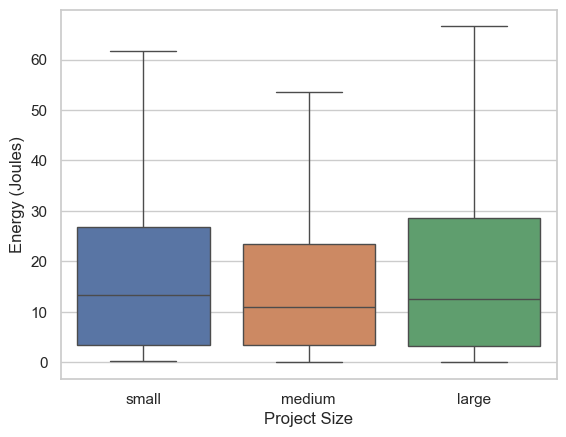

In [357]:
g = sns.boxplot(data = maven_energy, showfliers=False)#, log_scale=10)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
#g.set_yscale("log")

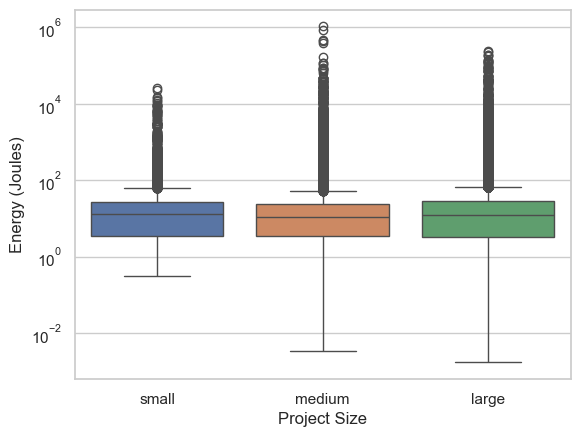

In [358]:
g = sns.boxplot(data = maven_energy, showfliers=True)#, log_scale=10)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

Small: Outliers: 984, Prop: 0.127, Energy: 0.856
Medium: Outliers: 6888, Prop: 0.138, Energy: 0.947
Large: Outliers: 9541, Prop: 0.120, Energy: 0.902


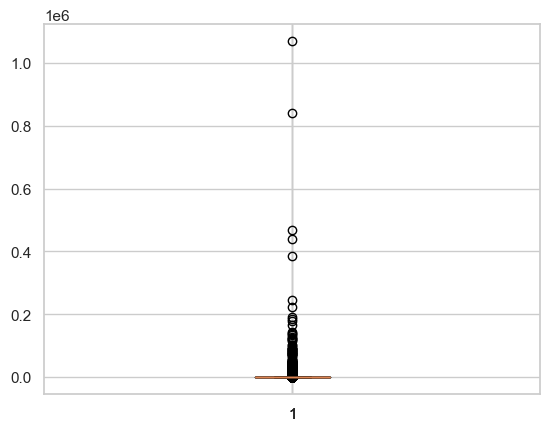

In [359]:
for x in sizes1:
  mav_x = maven_energy[x]
  r = plt.boxplot(mav_x)
  outliers =r["fliers"][0].get_ydata()
  print(f"{x.title()}: Outliers: {len(outliers)}, Prop: {len(outliers)/len(mav_x):.3f}, Energy: {sum(outliers)/sum(mav_x):.3f}")

Text(0, 0.5, 'Energy (Joules)')

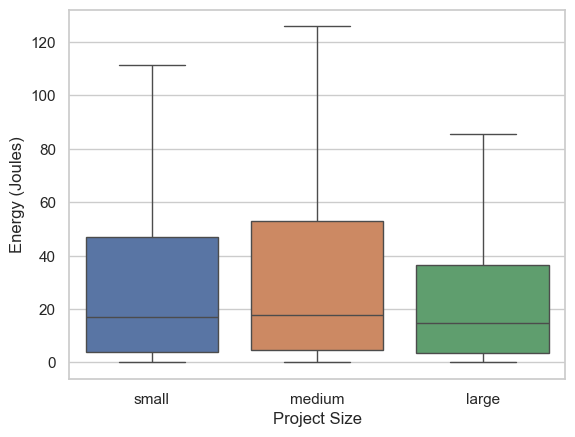

In [360]:
g = sns.boxplot(data = gradle_energy, showfliers=False)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
#g.set_yscale("log")

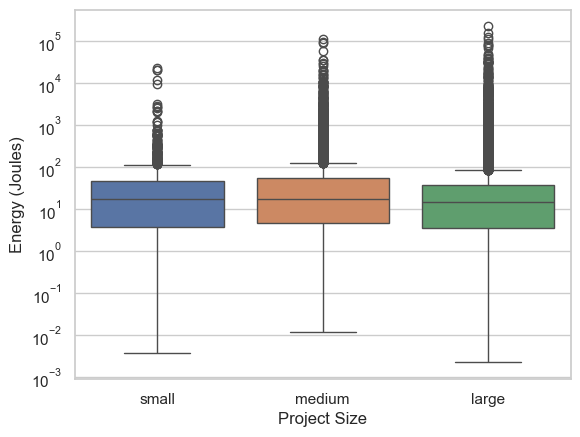

In [361]:
g = sns.boxplot(data = gradle_energy, showfliers=True)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

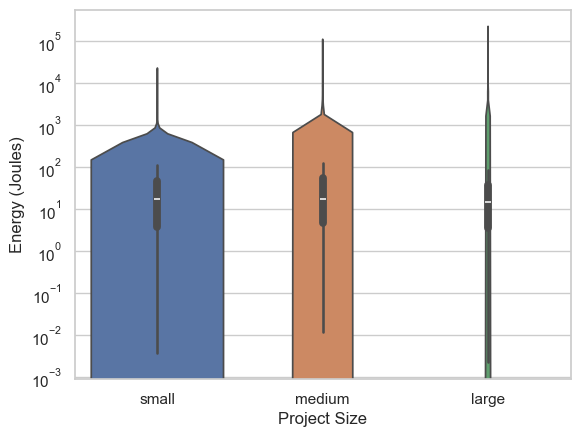

In [362]:
g = sns.violinplot(data = gradle_energy)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

Small: Outliers: 124, Prop: 0.103, Energy: 0.849
Medium: Outliers: 1782, Prop: 0.105, Energy: 0.810
Large: Outliers: 3891, Prop: 0.140, Energy: 0.905


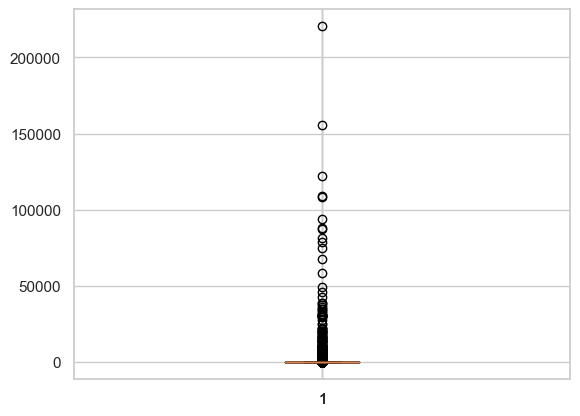

In [363]:
for x in sizes1:
  grad_x = gradle_energy[x]
  r = plt.boxplot(grad_x)
  outliers =r["fliers"][0].get_ydata()
  print(f"{x.title()}: Outliers: {len(outliers)}, Prop: {len(outliers)/len(grad_x):.3f}, Energy: {sum(outliers)/sum(grad_x):.3f}")

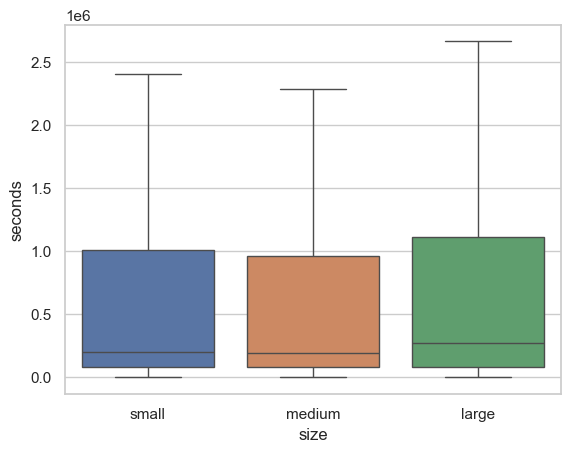

In [364]:
g = sns.boxplot(x = 'size', y = 'seconds', data = df_all_maven, showfliers=False, hue="size", order=sizes1)#, palette=my_colors) 

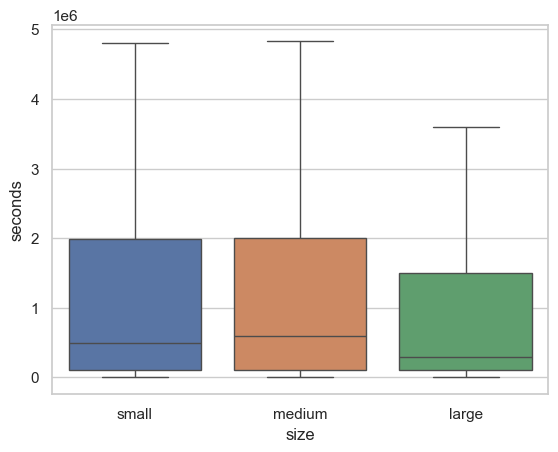

In [365]:
g = sns.boxplot(x = 'size', y = 'seconds', data = df_all_gradle, showfliers=False, hue="size", order=sizes1)#, palette=my_colors) 